# Explore here

##Hipótesis de Trabajo

**Objetivo del análisis:** Predecir si un paciente tiene o no diabetes a partir de variables clínicas.

### Hipótesis estadística:

- **Hipótesis nula (H₀):** Las variables clínicas (como glucosa, presión arterial, edad, etc.) **no tienen relación significativa** con el diagnóstico de diabetes (`Outcome`).
- **Hipótesis alternativa (H₁):** Las variables clínicas **sí tienen relación significativa** con el diagnóstico de diabetes y pueden utilizarse para predecir su aparición.

Vamos a construir un árbol de decisión para evaluar esta relación y la capacidad predictiva del modelo.

In [1]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [2]:

print(df.info())
print("\nValores nulos por columna:")
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

Valores nulos por columna:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction   

In [ ]:
cols_with_invalid_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in cols_with_invalid_zeros:
    count_zeros = (df[col] == 0).sum()
    print(f"{col}: {count_zeros} valores cero")

Glucose: 5 valores cero
BloodPressure: 35 valores cero
SkinThickness: 227 valores cero
Insulin: 374 valores cero
BMI: 11 valores cero


In [5]:
import numpy as np

df[cols_with_invalid_zeros] = df[cols_with_invalid_zeros].replace(0, np.nan)

df.isnull().sum()


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [7]:

for col in cols_with_invalid_zeros:
    mediana = df[col].median()
    df[col] = df[col].fillna(mediana)

df.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

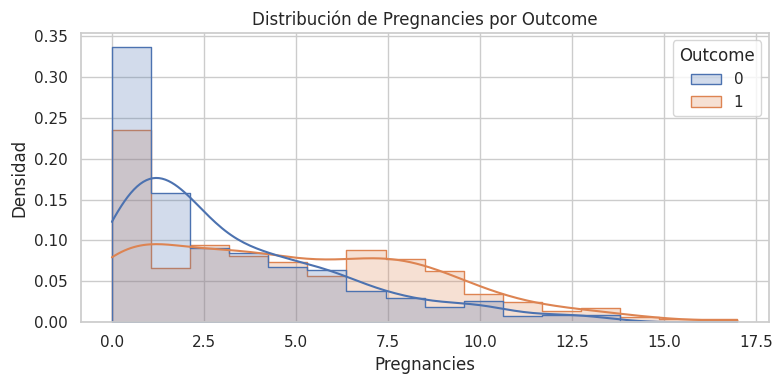

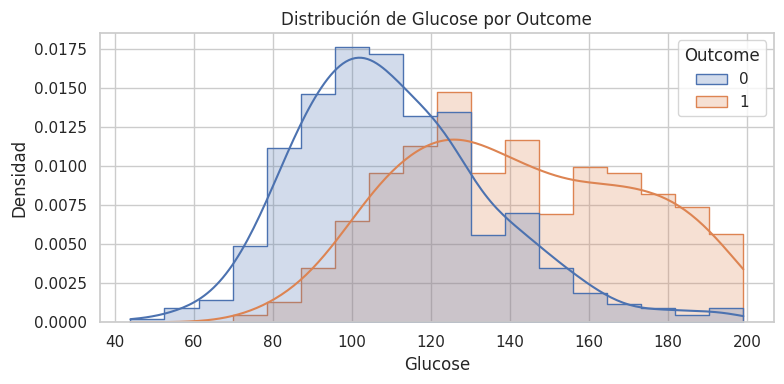

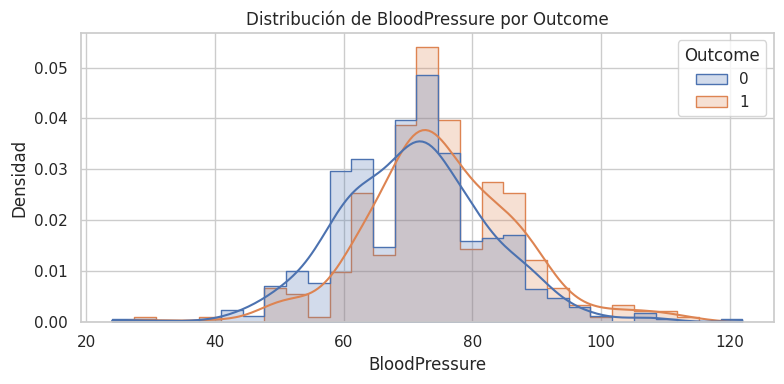

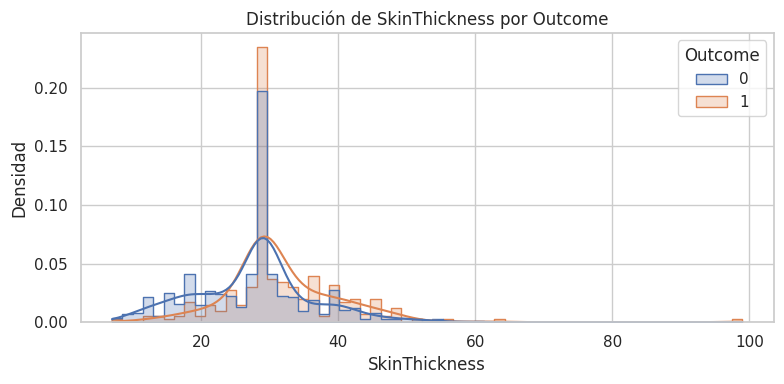

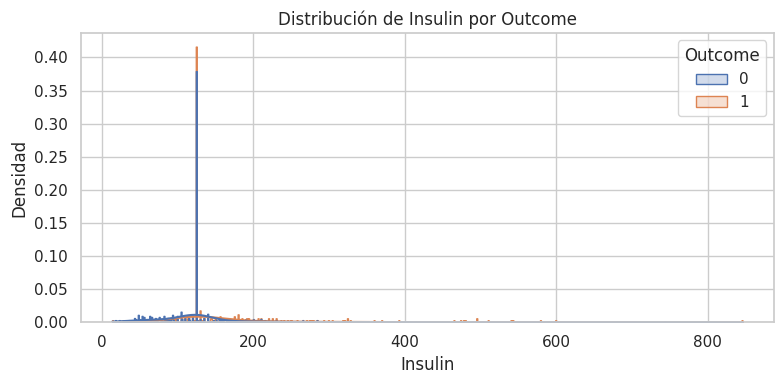

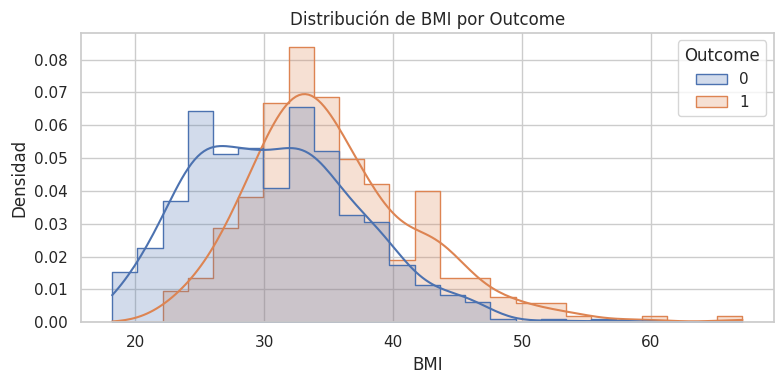

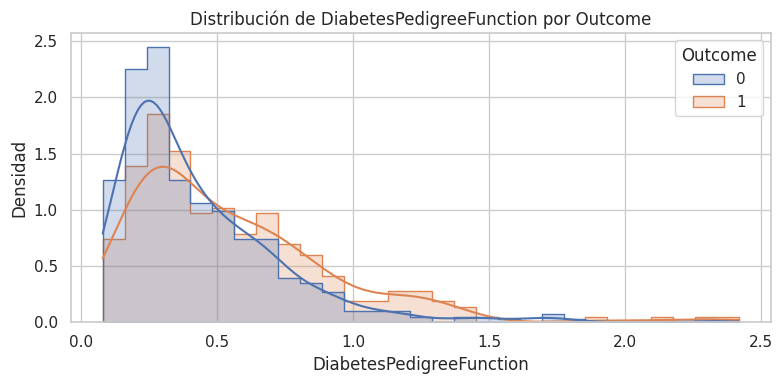

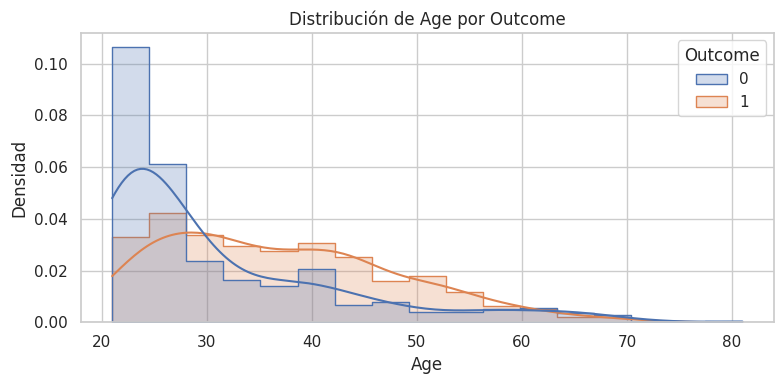

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")

# Lista de variables a visualizar
features = df.columns[:-1]  # todas excepto 'Outcome'

# Gráficos
for feature in features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=feature, hue="Outcome", kde=True, element="step", stat="density", common_norm=False)
    plt.title(f"Distribución de {feature} por Outcome")
    plt.xlabel(feature)
    plt.ylabel("Densidad")
    plt.tight_layout()
    plt.show()


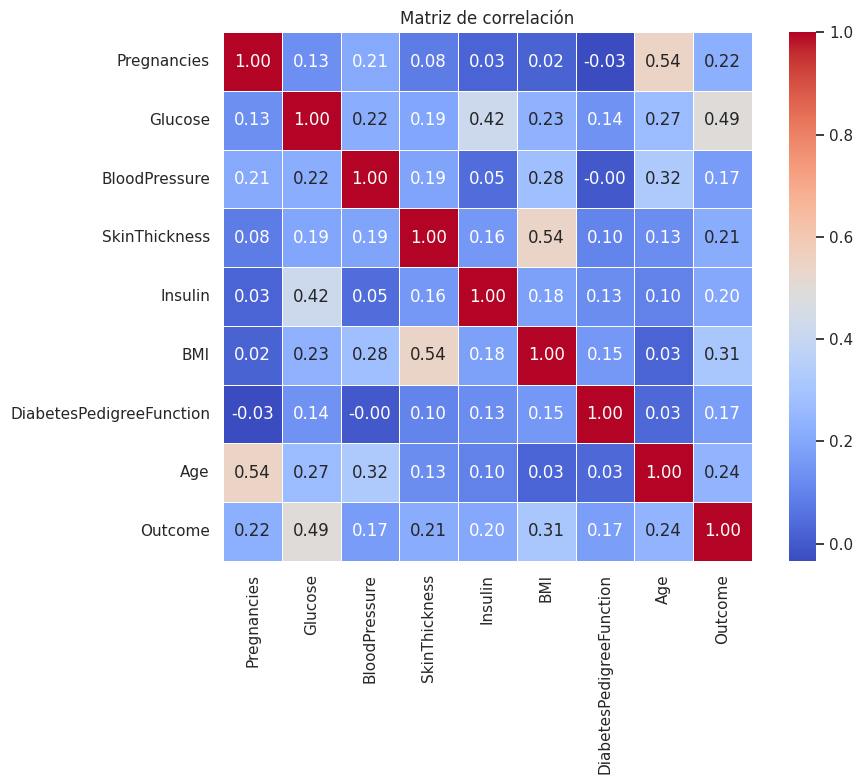

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title("Matriz de correlación")
plt.tight_layout()
plt.show()


In [10]:
from sklearn.model_selection import train_test_split


X = df.drop("Outcome", axis=1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Tamaño train: {X_train.shape}")
print(f"Tamaño test: {X_test.shape}")


Tamaño train: (614, 8)
Tamaño test: (154, 8)


In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

criterios = ['gini', 'entropy', 'log_loss']
resultados = {}

for criterio in criterios:
    print(f"\n=== Árbol con criterio: {criterio.upper()} ===")
    arbol = DecisionTreeClassifier(criterion=criterio, random_state=42)
    arbol.fit(X_train, y_train)
    y_pred = arbol.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    
    resultados[criterio] = acc



=== Árbol con criterio: GINI ===
Accuracy: 0.6818
              precision    recall  f1-score   support

           0       0.74      0.79      0.76       100
           1       0.55      0.48      0.51        54

    accuracy                           0.68       154
   macro avg       0.65      0.64      0.64       154
weighted avg       0.67      0.68      0.68       154


=== Árbol con criterio: ENTROPY ===
Accuracy: 0.6753
              precision    recall  f1-score   support

           0       0.75      0.76      0.75       100
           1       0.54      0.52      0.53        54

    accuracy                           0.68       154
   macro avg       0.64      0.64      0.64       154
weighted avg       0.67      0.68      0.67       154


=== Árbol con criterio: LOG_LOSS ===
Accuracy: 0.6753
              precision    recall  f1-score   support

           0       0.75      0.76      0.75       100
           1       0.54      0.52      0.53        54

    accuracy          

In [12]:
from sklearn.model_selection import GridSearchCV

arbol_base = DecisionTreeClassifier(criterion='gini', random_state=42)

param_grid = {
    'max_depth': [3, 5, 7, 9, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=arbol_base, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

print("Mejores parámetros encontrados:", grid_search.best_params_)
print("Mejor accuracy en validación cruzada:", grid_search.best_score_)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
Mejores parámetros encontrados: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Mejor accuracy en validación cruzada: 0.742782886845262


Accuracy en test: 0.6883116883116883
              precision    recall  f1-score   support

           0       0.70      0.92      0.79       100
           1       0.64      0.26      0.37        54

    accuracy                           0.69       154
   macro avg       0.67      0.59      0.58       154
weighted avg       0.68      0.69      0.64       154



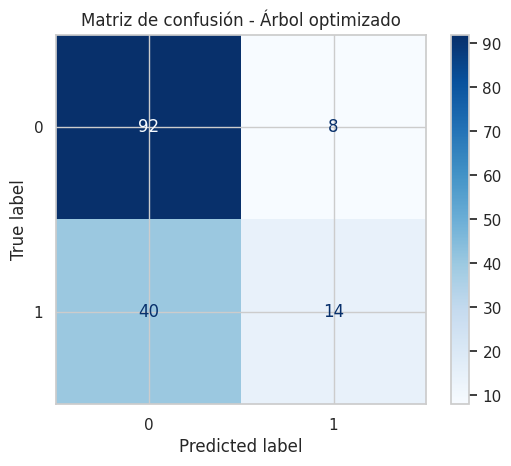

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

mejor_modelo = grid_search.best_estimator_

y_pred_opt = mejor_modelo.predict(X_test)

print("Accuracy en test:", accuracy_score(y_test, y_pred_opt))
print(classification_report(y_test, y_pred_opt))

cm = confusion_matrix(y_test, y_pred_opt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mejor_modelo.classes_)
disp.plot(cmap="Blues")
plt.title("Matriz de confusión - Árbol optimizado")
plt.show()

## Conclusión del Proyecto: Árbol de Decisión para Predicción de Diabetes

### 1. Análisis Exploratorio de Datos (EDA)
- Se identificaron valores cero no válidos en columnas clínicas (como Glucosa, Presión, etc.) y fueron tratados como valores faltantes (NaN).
- Se imputaron con la mediana de cada variable.
- Las variables **Glucose**, **BMI** y **Age** mostraron mayor correlación con el diagnóstico de diabetes (`Outcome`).

### 2. Modelado Inicial
- Se evaluaron tres funciones de pureza: `gini`, `entropy` y `log_loss`.
- El mejor desempeño se obtuvo con `gini` (accuracy ~0.68).

### 3. Optimización del Modelo
- Se realizó una búsqueda de hiperparámetros con `GridSearchCV`.
- El mejor modelo fue un árbol con `max_depth=3`, `min_samples_split=2`, `min_samples_leaf=1`.
- Accuracy en validación cruzada: **~0.7428**.

### 4. Evaluación Final
- Accuracy en conjunto de prueba: **~0.688**.
- Alta precisión para la clase 0 (sin diabetes).
- Baja sensibilidad (recall) para la clase 1 (con diabetes), con muchos falsos negativos.

### 5. Conclusión Técnica
- El modelo es bueno detectando pacientes sin diabetes, pero **ineficiente en detectar casos positivos**.
- Esto sugiere:
  - Posible **desbalance de clases**.
  - Modelo poco complejo (profundidad limitada).
  - Oportunidad de mejora con modelos más robustos (Random Forest, Boosting) o técnicas de rebalanceo (SMOTE, class weights, etc.).

